## Computational Finance Lab-4
## ID : 201801015

In [1]:
import random
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import math
from statistics import NormalDist

In [2]:
def brownian(s,t,n):
    np.random.seed(s)
    x = np.linspace(0,t,num=int(t*n))
    w = np.zeros(int(t*n))
    for i in range(1,int(t*n)):
        w[i] = w[i-1] + np.random.normal()/np.sqrt(n)
    return x,w

def plotB(x,w):
    plt.figure(figsize=(15, 6))
    plt.plot(x,w)
    plt.title('Regular Brownian Motion from Normal Distribution', fontsize=30)
    plt.ylabel('W', fontsize=15)
    plt.xlabel('Time', fontsize=15)
    plt.grid()
    plt.show()

def geoBrownStock(s0,mu,sigma,t,n,seed,show):
    s = np.zeros(int(t*n))
    x,w = brownian(seed,t,n)
    for i in range(int(t*n)):
        s[i] = s0*math.exp((mu-sigma*sigma/2.00)*x[i] + (sigma*w[i]) ) 
    if (show == True):
        plt.plot(x,s)
        plt.title('Stock Price using Geometric Brownian Motion', fontsize=30)
        plt.ylabel('S', fontsize=15)
        plt.xlabel('Time', fontsize=15)
        plt.legend(['Original','Predicted'])
        plt.grid()
        plt.show()
    return w,s

def showStock(df1,t,n,reverse):
    #print(t*n)
    df1 = np.array(df1)
    if reverse == True:
        df1 = df1[::-1]
    plt.figure(figsize=(15, 6))
    plt.plot(np.linspace(0,t,num=round(t*n)),df1)

def musigma(df1):
    df2 = np.zeros(df1.size-1)
    summ = 0
    for i in range(df1.size-1):
        df2[i] = (df1[i+1]-df1[i])/df1[i]
    mu = df2.mean()
    df3 = np.zeros(df1.size-1)
    for i in range(1,df3.size+1):
        df3[i-1] = np.log(df1[i]/df1[i-1])
    mean = df3.mean()
    s = 0;
    for i in range(df3.size):
        s = s + (df3[i] - mean)*(df3[i] - mean)
    s = s / (df3.size - 1)
    s = math.sqrt(s)
    sigma = s / math.sqrt(1/365.00)
    print("Predicted Mean: "+str(mu))
    print("Predicted Sigma: "+str(sigma))
    return mu,sigma

def predictModel(df1,mu,sigma,seed):
    df1 = np.array(df1)
    #df1 = df1[::-1]
    s0 = df1[0]
    w,stock = geoBrownStock(s0,mu,sigma,df1.size/365.00,365.00,seed,True)
    return stock

def monteCarlo(r,T,k):
    st = stock[-1]
    t=len(stock)/365
    N=365
    x_axis=np.linspace(0,t,int(t*N))
    df2 = np.zeros(len(stock))
    K = 40500
    for i in range(len(x_axis)):
        df2[i] = math.exp(-r * (t-x_axis[i]))*max(st - K,0)
    return df2

def BSF(r,T,k):
    st = stock[-1]
    t=len(stock)/365
    N=365
    x_axis=np.linspace(0,t,int(t*N))
    df1 = df['Close']
    df3 = np.zeros(len(stock))
    K = 40500
    for i in range(len(x_axis)):
        if(x_axis[i]!=t):
            d_plus = (np.log(stock[i]/K) + (r + 0.5*sigma**2)*(t-x_axis[i]))/(sigma*(t-x_axis[i]))
        else:
            d_plus=float('inf')
        d_minus = d_plus - sigma*np.sqrt(t-x_axis[i])
        df3[i] = stock[i]*NormalDist(mu=0, sigma=1).cdf(d_plus) - K*math.exp(-r*(t-x_axis[i])) * NormalDist(mu=0, sigma=1).cdf(d_minus)
    return df3

Predicted Mean: 0.00045303059302247655
Predicted Sigma: 0.15891429294795312


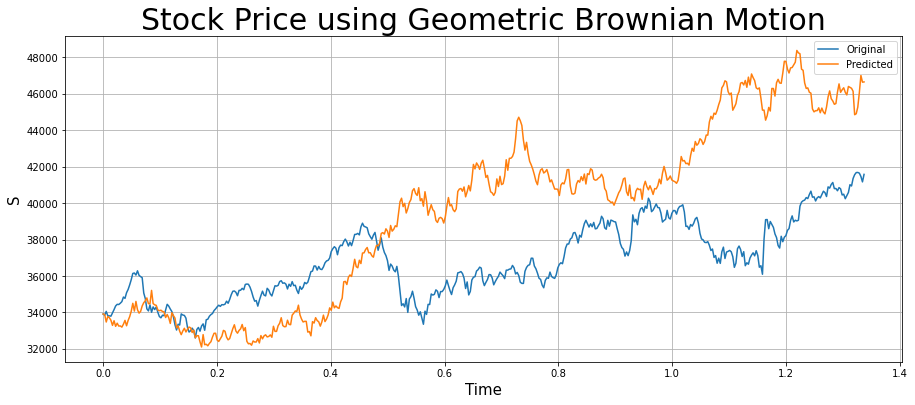

Predicted Mean: 0.0006940543580632152
Predicted Sigma: 0.1688044283189995


(0.0006940543580632152, 0.1688044283189995)

In [3]:
df = pd.read_csv('sensex_stock.csv')
df1 = df['Close']
#df1 = df1[:100]
showStock(df1,df1.size/365.00,365.00,False)
mu,sigma = musigma(df1)
stock = predictModel(df1,mu,sigma,22)
musigma(stock)

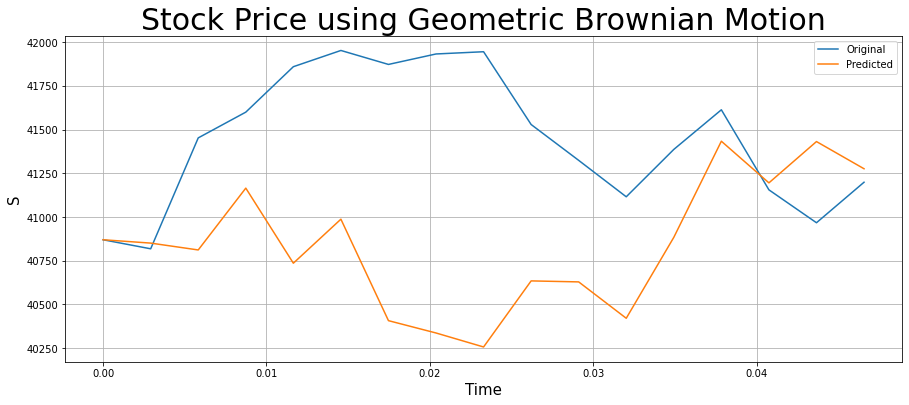

In [187]:
df = pd.read_csv('sensex_stock_future.csv')
df1 = df['Close']
df1 = df1.to_numpy()
showStock(df1,df1.size/365.00,365.00,False)
stock = predictModel(df1,mu,sigma,21)
df = pd.read_csv('sensex_option.csv')
df1 = df['Close']
df2 = monteCarlo(6.59 / 100,17/265,40500)
df3 = BSF(6.59 / 100,17/265,40500)

In [188]:
print("Actual Option Price is : "+str(df1[0]))
print("Final Option Price Prediction via Monte-Carlo GBM is : "+str(df2[0]))
print("Final Option Price Prediction via Black-Scholes Formula is : "+str(df3[0]))

Actual Option Price is : 704.75
Final Option Price Prediction via Monte-Carlo GBM is : 773.3690628494998
Final Option Price Prediction via Black-Scholes Formula is : 601.9206400611438
